In [1]:
%matplotlib inline
#data manipulation
import numpy as np
import pandas as pd
#python imports
import math,time,random,datetime
#data visualisation
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
plt.style.use('seaborn-whitegrid')
#preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize
#machine learning
from sklearn.model_selection import train_test_split
from sklearn import model_selection,tree,preprocessing,metrics
from sklearn.ensemble import GradientBoostingClassifier
import warnings
warnings.filterwarnings("ignore")

## Description about features

survival -- Survival 0 = No, 1 = Yes

pclass -- Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd

sex -- Sex

Age -- Age (in years)

sibsp -- No of siblings/spouses aboard the Titanic

parch -- No of parents / children aboard the Titanic

ticket -- Ticket number

fare -- Passenger fare

cabin -- Cabin number

embarked -- Port of Embarkation

In [2]:
train=pd.read_csv('train_titanic.csv')
test=pd.read_csv('test_titanic.csv')
gender_submission=pd.read_csv('gender_submission.csv')

In [3]:
print(len(train))
print(len(test))

891
418


In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [7]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


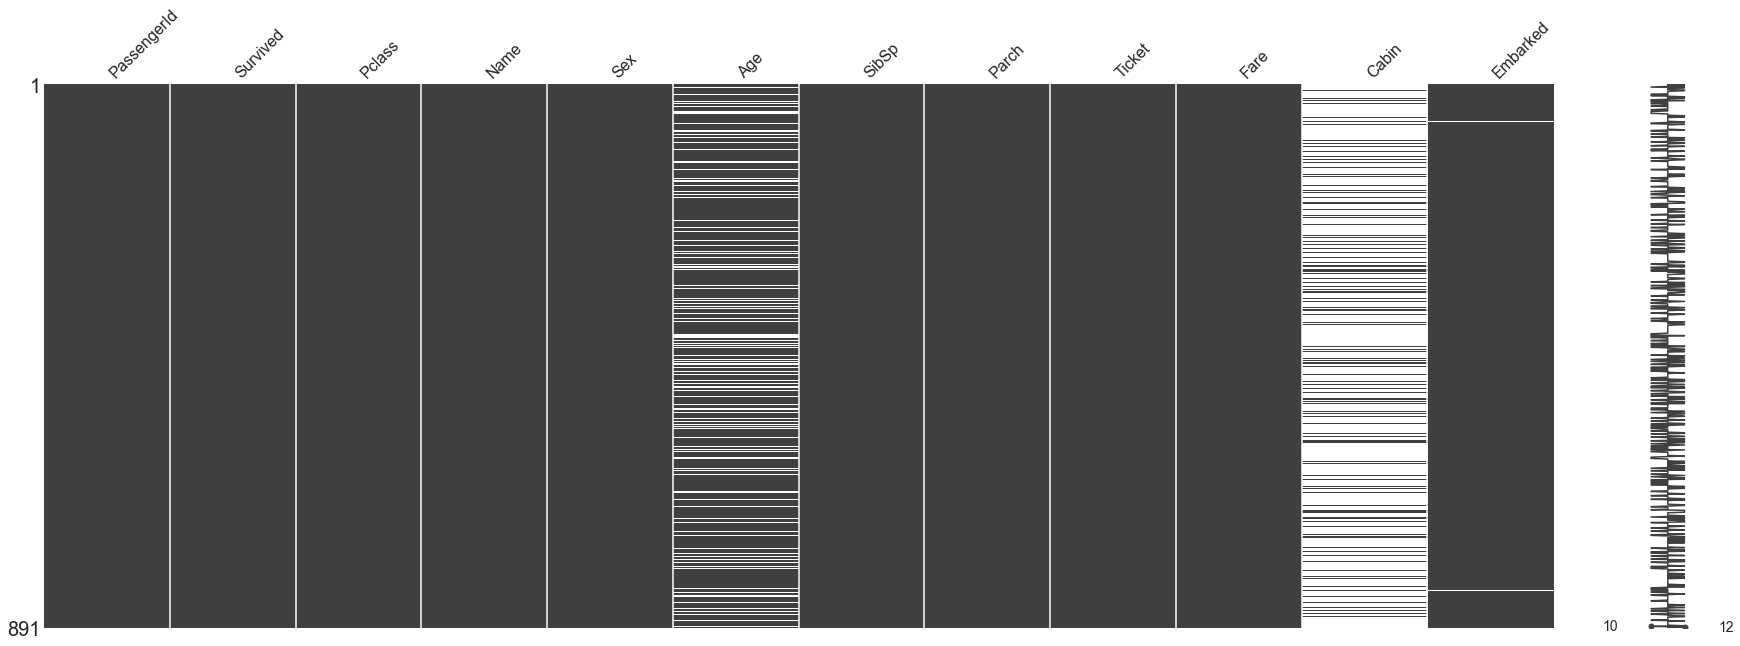

In [8]:
missingno.matrix(train, figsize=(30,10))

In [9]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [10]:
def find_missing_values(df, columns):
    missing_val={}
    df_length=len(train)
    for column in columns:
        total_column_values=df[column].value_counts().sum()
        missing_val[column]=df_length-total_column_values
    return missing_val

missing_values=find_missing_values(train,train.columns)
missing_values

{'PassengerId': 0,
 'Survived': 0,
 'Pclass': 0,
 'Name': 0,
 'Sex': 0,
 'Age': 177,
 'SibSp': 0,
 'Parch': 0,
 'Ticket': 0,
 'Fare': 0,
 'Cabin': 687,
 'Embarked': 2}

In [11]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [12]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Visualising Features

In [13]:
train.PassengerId.value_counts()

891    1
293    1
304    1
303    1
302    1
      ..
591    1
590    1
589    1
588    1
1      1
Name: PassengerId, Length: 891, dtype: int64

We can see that all the values are unique

0    549
1    342
Name: Survived, dtype: int64


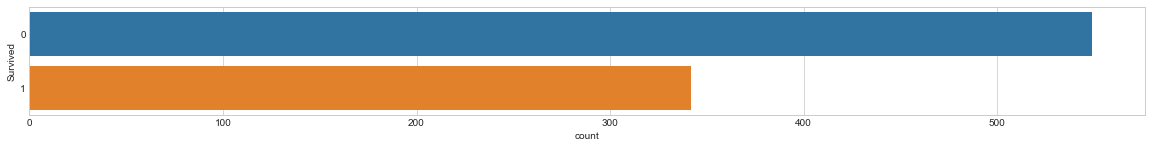

In [14]:
fig=plt.figure(figsize=(20,2))
sns.countplot(y='Survived',data=train);
print(train.Survived.value_counts())

3    491
1    216
2    184
Name: Pclass, dtype: int64


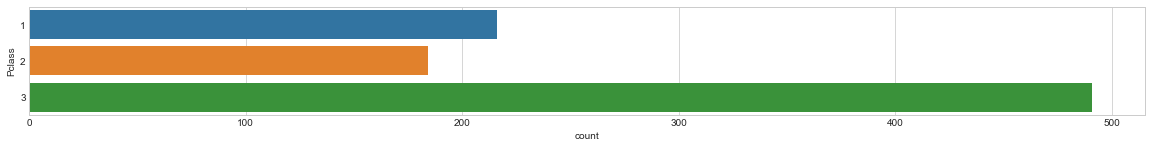

In [15]:
fig=plt.figure(figsize=(20,2))
sns.countplot(y='Pclass',data=train);
print(train.Pclass.value_counts())

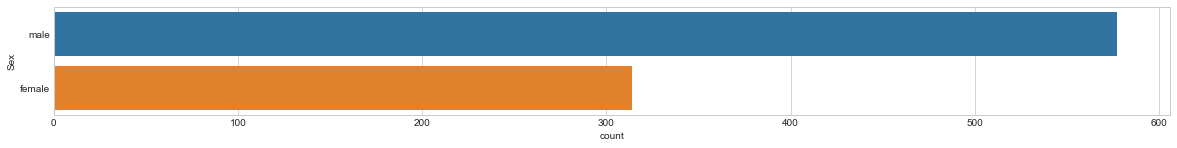

In [16]:
plt.figure(figsize=(20,2))
sns.countplot(y='Sex',data=train)

In [17]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
train.Age.value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64

In [19]:
missing_values['Age']

177

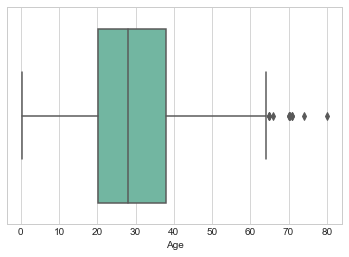

In [20]:
sns.boxplot(train['Age'],palette = "Set2")

We can say that there are only 88 values in Age feature. So, we need to treat these values

In [21]:
train.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [22]:
missing_values['SibSp']

0

In [23]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


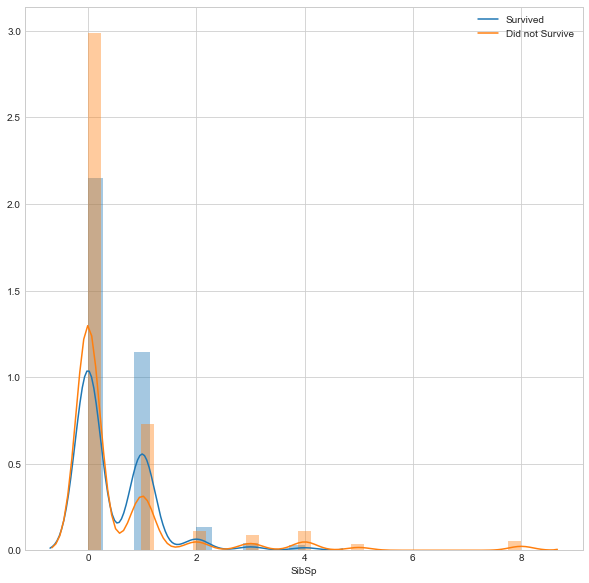

In [24]:
fig = plt.figure(figsize=(10,10))
sns.distplot(train.loc[train['Survived']==1]['SibSp'],kde_kws={'label':'Survived'})
sns.distplot(train.loc[train['Survived']==0]['SibSp'],kde_kws={'label':'Did not Survive'})

We can say from observing the above graph that the survival rate depends on the number of relatives(Spouse or Siblings). The higher the number lower is the death rate.

In [25]:
train.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [26]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [27]:
missing_values['Parch']

0

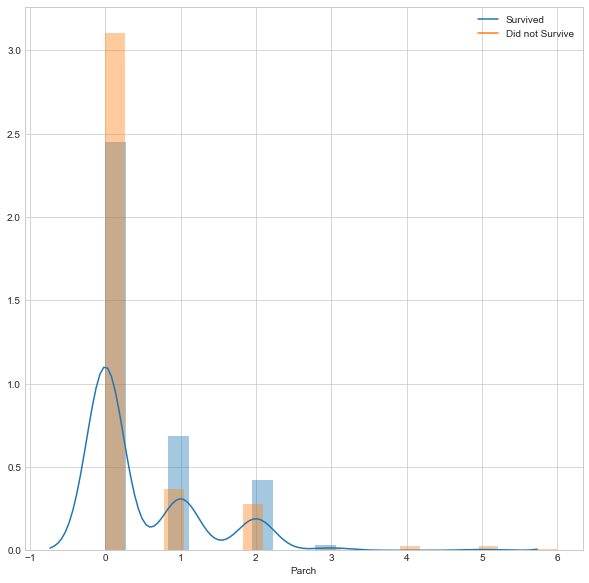

In [28]:
fig = plt.figure(figsize=(10,10))
sns.distplot(train.loc[train['Survived']==1]['Parch'],kde_kws={'label':'Survived'})
sns.distplot(train.loc[train['Survived']==0]['Parch'],kde_kws={'label':'Did not Survive'})

We can say from observing the above graph that the survival rate also depend on the fact if you've a parent or children on the board. The higher this number lower is the death rate.

In [29]:
train.Ticket.value_counts()

347082             7
1601               7
CA. 2343           7
3101295            6
347088             6
                  ..
349224             1
349234             1
345769             1
SOTON/OQ 392076    1
349236             1
Name: Ticket, Length: 681, dtype: int64

In [30]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [31]:
missing_values['Ticket']

0

In [32]:
missing_values['Fare']

0

In [33]:
train.Fare.value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
8.4583      1
9.8375      1
8.3625      1
14.1083     1
17.4000     1
Name: Fare, Length: 248, dtype: int64

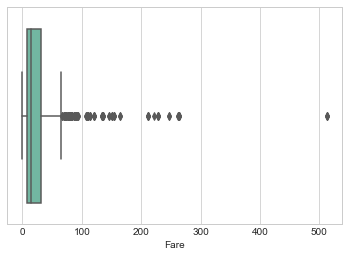

In [34]:
sns.boxplot(train['Fare'],palette = "Set2")

In [35]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [36]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

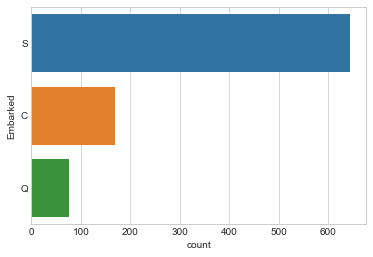

In [37]:
sns.countplot(y='Embarked',data=train)

In [38]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Feature Engineering , Data Filtering , Outlier Detection

The two features Fare and Age contains outliers as observed from the box plot and their minimum value.

The minimum value of Age in the dataset is 0.42 which is not possible as age must be the whole number.

The minimum value of Fare in the dataset is 0 which again isn't possible as no one is allowed to travel for free. 

We'll use Inter Quartile Range to detect and remove Outliers and for treating missing values in age we would replace them with median.

In [39]:
train['Age'] = train['Age'].fillna(train['Age'].median())

In [40]:
train['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [41]:
def outlier_treatment(datacolumn):
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn , [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return (lower_range,upper_range)

In [42]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [43]:
lowerbound,upperbound = outlier_treatment(train['Age'])
train.drop(train[(train['Age'] > upperbound) | (train['Age'] < lowerbound) ].index , inplace=True)

In [44]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


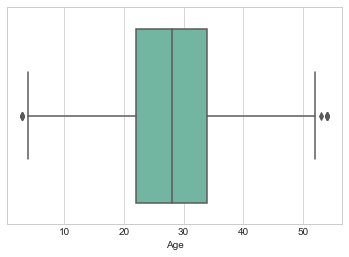

In [45]:
sns.boxplot(train['Age'],palette = "Set2")

In [46]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [47]:
train['Fare'] = train['Fare'].clip(lower = 0)

In [48]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [49]:
lowerbound,upperbound = outlier_treatment(train['Fare'])
train.drop(train[(train['Fare'] > upperbound) | (train['Fare'] < lowerbound) ].index , inplace=True)

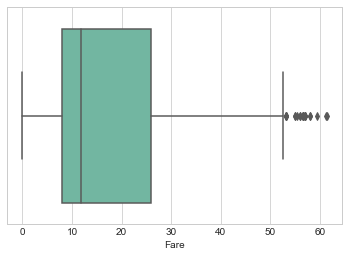

In [50]:
sns.boxplot(train['Fare'],palette = "Set2")

In [51]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,NaN,Q


PassengerID - feature dropped since it is unique for all records.

Sex - converted to 0 for male and 1 for female

Cabin - contains a lot of unique values, so it is dropped.

Ticket - contains max unique values, dropped


In [52]:
train.drop('PassengerId', axis = 1, inplace=True)

train.drop('Cabin',axis = 1, inplace=True)

train.drop('Ticket',axis = 1, inplace=True)

Extracting a new feature from Name which is Title. 

Drop Name and add Title as a new feature in train set.


In [53]:
train.Name.value_counts()

Braund, Mr. Owen Harris                            1
Humblen, Mr. Adolf Mathias Nicolai Olsen           1
Healy, Miss. Hanora "Nora"                         1
Asim, Mr. Adola                                    1
Nicola-Yarred, Miss. Jamila                        1
                                                  ..
Bjornstrom-Steffansson, Mr. Mauritz Hakan          1
Sharp, Mr. Percival James R                        1
Drew, Mrs. James Vivian (Lulu Thorne Christian)    1
Hocking, Mr. Richard George                        1
Bourke, Mrs. John (Catherine)                      1
Name: Name, Length: 718, dtype: int64

In [54]:
train['Title'] = train.Name.apply(lambda name: name.split(',')[1].split('.')[0].strip())

In [55]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr
5,0,3,"Moran, Mr. James",male,28.0,0,0,8.4583,Q,Mr


In [56]:
train.Title.value_counts()

Mr          452
Miss        132
Mrs          93
Master       23
Dr            5
Rev           5
Major         2
Ms            1
Lady          1
Jonkheer      1
Don           1
Mlle          1
Sir           1
Name: Title, dtype: int64

In [57]:
def replace_titles(x):
    title = x['Title']
    if title in ['Capt', 'Col', 'Don', 'Jonkheer', 'Major', 'Rev', 'Sir']:
        return 'Mr'
    elif title in ['the Countess', 'Mme', 'Lady']:
        return 'Mrs'
    elif title in ['Mlle', 'Ms']:
        return 'Miss'
    elif title =='Dr':
        if x['Sex']=='male':
            return 'Mr'
        else:
            return 'Mrs'
    else:
        return title

    
# And replace the titles, so the are normalized to 'Mr', 'Miss' and 'Mrs'
train['Title'] = train.apply(replace_titles, axis=1)

In [58]:
train.Title.value_counts()

Mr        466
Miss      134
Mrs        95
Master     23
Name: Title, dtype: int64

In [59]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr
5,0,3,"Moran, Mr. James",male,28.0,0,0,8.4583,Q,Mr


In [60]:
train.drop('Name',axis = 1, inplace=True)

In [61]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,Mr
2,1,3,female,26.0,0,0,7.9250,S,Miss
3,1,1,female,35.0,1,0,53.1000,S,Mrs
4,0,3,male,35.0,0,0,8.0500,S,Mr
5,0,3,male,28.0,0,0,8.4583,Q,Mr


In [62]:
train = train.apply(LabelEncoder().fit_transform)

In [63]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,2,1,21,1,0,17,2,2
2,1,2,0,27,0,0,40,2,1
3,1,0,0,40,1,0,182,2,3
4,0,2,1,40,0,0,42,2,2
5,0,2,1,29,0,0,50,1,2


In [64]:
train.shape

(718, 9)

In [65]:
y_train = train['Survived']
y_train.head()

0    0
2    1
3    1
4    0
5    0
Name: Survived, dtype: int64

In [66]:
X_train = train.drop('Survived',axis=1)

In [67]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,2,1,21,1,0,17,2,2
2,2,0,27,0,0,40,2,1
3,0,0,40,1,0,182,2,3
4,2,1,40,0,0,42,2,2
5,2,1,29,0,0,50,1,2


Adding the new feature Title in test data

In [68]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [69]:
submission = pd.DataFrame()
submission['PassengerId'] = test['PassengerId']

In [70]:
test.drop('PassengerId',axis = 1, inplace=True)

In [71]:
test['Title'] = test.Name.apply(lambda name: name.split(',')[1].split('.')[0].strip())
test['Title'] = test.apply(replace_titles, axis=1)

In [72]:
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr
3,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs


In [73]:
test.drop('Name',axis = 1, inplace=True)

In [74]:
test.drop('Ticket',axis = 1, inplace=True)

In [75]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,3,male,34.5,0,0,7.8292,NaN,Q,Mr
1,3,female,47.0,1,0,7.0000,NaN,S,Mrs
2,2,male,62.0,0,0,9.6875,NaN,Q,Mr
3,3,male,27.0,0,0,8.6625,NaN,S,Mr
4,3,female,22.0,1,1,12.2875,NaN,S,Mrs


In [76]:
test.drop('Cabin',axis = 1, inplace=True)

In [77]:
test = test.apply(LabelEncoder().fit_transform)

In [78]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,2,1,44,0,0,24,1,3
1,2,0,60,1,0,5,2,4
2,1,1,74,0,0,41,1,3
3,2,1,34,0,0,34,2,3
4,2,0,27,1,1,46,2,4


## Predictions

Following models are used below :- 
1. K-Nearest Neighbours
2. SVM
3. Logistic Regression
4. Decision Trees

In [79]:
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 5, weights='distance', p = 2)   
knn.fit(X_train, y_train) 

acc_gbt = round(knn.score(X_train,y_train)*100,2)
train_pred = model_selection.cross_val_predict(knn, X_train, y_train, cv=10, n_jobs=-1)
acc_cv_gbt = round(metrics.accuracy_score(y_train,train_pred)*100,2)

print("Accuracy: %s" % acc_gbt) 
print("Accuracy CV 10-fold: %s" % acc_cv_gbt)

Accuracy: 97.49
Accuracy CV 10-fold: 71.73


In [80]:
from sklearn import svm
clf_svm = svm.SVC(C = 2, kernel = 'linear')
clf_svm.fit(X_train, y_train)

acc_gbt = round(clf_svm.score(X_train,y_train)*100,2)
train_pred=model_selection.cross_val_predict(clf_svm,X_train,y_train,cv=10,n_jobs=-1)
acc_cv_gbt=round(metrics.accuracy_score(y_train,train_pred)*100,2)

print("Accuracy: %s" % acc_gbt) 
print("Accuracy CV 10-fold: %s" % acc_cv_gbt)

Accuracy: 78.41
Accuracy CV 10-fold: 78.41


In [81]:
from sklearn.linear_model import LogisticRegression
clf_logistic = LogisticRegression(penalty = 'l1', C = 1, solver='liblinear')
clf_logistic.fit(X_train, y_train)

acc_gbt = round(clf_logistic.score(X_train,y_train)*100,2)
train_pred = model_selection.cross_val_predict(clf_logistic,X_train,y_train,cv=10,n_jobs=-1)
acc_cv_gbt = round(metrics.accuracy_score(y_train,train_pred)*100,2)

print("Accuracy: %s" % acc_gbt) 
print("Accuracy CV 10-fold: %s" % acc_cv_gbt)

Accuracy: 79.67
Accuracy CV 10-fold: 78.27


In [82]:
clf=GradientBoostingClassifier()
clf.fit(X_train,y_train)
acc_gbt = round(clf.score(X_train,y_train)*100,2)
train_pred=model_selection.cross_val_predict(clf,X_train,y_train,cv=10,n_jobs=-1)
acc_cv_gbt=round(metrics.accuracy_score(y_train,train_pred)*100,2)
print("Accuracy: %s" % acc_gbt) 
print("Accuracy CV 10-fold: %s" % acc_cv_gbt)

Accuracy: 90.53
Accuracy CV 10-fold: 83.01


In [83]:
pred = clf_logistic.predict(test)

In [84]:
submission['Survived'] = pred

In [85]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [86]:
submission.to_csv(r'C:\Users\Asus\OneDrive\Desktop\titanic\submission.csv',index=False)
print("submission is ready")

submission is ready


In [138]:
#criteria for dividing the tree into subtrees
criterion = ['gini','entropy']

#depth of tree
max_depth = [int(x) for x in np.linspace(5,55,11)]
max_depth.append(None)

#maximum features to consider at every split
max_features = ['auto', 'sqrt', 'log2', None]
                 

# Minimum number of samples required to split a node
min_samples_split = [int(x) for x in np.linspace(50, 100, 10)]

# Minimum decrease in impurity required for split to happen
min_impurity_decrease = [0.0, 0.05, 0.1]

#to decide the splitter to choose
splitter = ['best','random']

# Create the grid
dt_grid = {'max_depth': max_depth,
           'max_features': max_features,
           'criterion': criterion,
           'min_samples_split': min_samples_split,
           'min_impurity_decrease': min_impurity_decrease,
          'splitter' : splitter}

In [139]:
dt_grid

{'max_depth': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, None],
 'max_features': ['auto', 'sqrt', 'log2', None],
 'criterion': ['gini', 'entropy'],
 'min_samples_split': [50, 55, 61, 66, 72, 77, 83, 88, 94, 100],
 'min_impurity_decrease': [0.0, 0.05, 0.1],
 'splitter': ['best', 'random']}

In [140]:
from sklearn.model_selection import RandomizedSearchCV

# Create the model to be tuned
dt_base = DecisionTreeClassifier()

# Create the random search Random Forest
dt_random = RandomizedSearchCV(estimator = dt_base, param_distributions = dt_grid, 
                               n_iter = 200, cv = 3, verbose = 2, random_state = 42, 
                               n_jobs = -1)

# Fit the random search model
dt_random.fit(X_train, y_train)

# View the best parameters from the random search
dt_random.best_params_

Fitting 3 folds for each of 200 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 562 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    0.7s finished


{'splitter': 'random',
 'min_samples_split': 50,
 'min_impurity_decrease': 0.0,
 'max_features': 'sqrt',
 'max_depth': 20,
 'criterion': 'entropy'}

In [141]:
train_pred = model_selection.cross_val_predict(dt_random , X_train, y_train, cv=10, n_jobs=-1)
acc_cv_gbt = round(metrics.accuracy_score(y_train,train_pred)*100,2)
acc_gbt = round(dt_random.score(X_train,y_train)*100,2)

print("Accuracy: %s" % acc_gbt) 
print("Accuracy CV 10-fold: %s" % acc_cv_gbt)

Accuracy: 79.25
Accuracy CV 10-fold: 80.5


In [142]:
pred = dt_random.predict(test)
pred

array([0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,

In [143]:
submission['Survived'] = pred

In [144]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [145]:
submission.to_csv(r'C:\Users\Asus\OneDrive\Desktop\titanic\submission.csv',index=False)
print("submission is ready")

submission is ready
